# Space control

This notebook is intended to deliver space control variables for both teams passed to the function. <br>
This will later be transformed into function stored in a py.-file  <br>

In [1]:
from floodlight import Pitch
from floodlight.io import dfl
# import the custom class and associated functions
from pies import SuccessScore as ss

# read position data and match information file
position_file = 'PositionData/DFL_04_02_positions_raw_DFL-COM-000001_DFL-MAT-0027AD.xml'
matchinfo ='MI_Data/DFL_02_01_matchinformation_DFL-COM-000001_DFL-MAT-0027AD-Copy1.xml'

# returns multipe objects; at this point we only care about the positions (xy_objects) and the pitch object (pitch)
xy_objects, possession_objects, ballstatus_objects, teamsheets, pitch = dfl.read_position_data_xml(filepath_positions=position_file,
                          filepath_mat_info=matchinfo)



In [2]:
SCR_A1, SCR_B1, SCR_A2, SCR_B2, dvm1, dvm2 = ss.Space_Control(pos_data=xy_objects, pitch=pitch, area='penalty area', )
SCR_A1

TeamProperty(property=array([[0. ],
       [0. ],
       [0. ],
       ...,
       [2.5],
       [2.5],
       [2.5]]), name='space control Team A, right', framerate=25)

<Axes: >

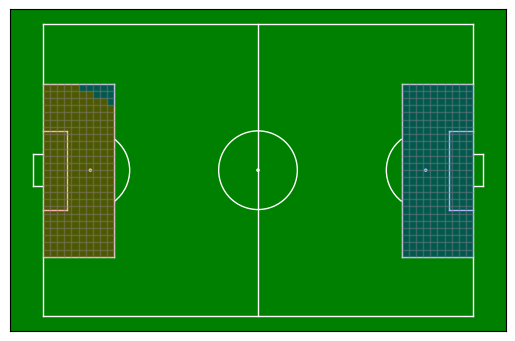

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
pitch.plot(ax = ax)
dvm1.plot(ax =ax, t=1000)
# 

In [4]:
SCR_A1.slice(1000,1001), SCR_B1.slice(1000,1001)
# first half, B = Blue, right to left; A = red, left to right

(TeamProperty(property=array([[0.]]), name='space control Team A, right', framerate=25),
 TeamProperty(property=array([[3.75]]), name='space control, Team B, left', framerate=25))

In [5]:
SCR_A2.slice(4000,4001), SCR_B2.slice(4000,4001)
# second half, B = Blue, left to right; A = red, right to left

(TeamProperty(property=array([[0.]]), name='space control, Team A, left', framerate=25),
 TeamProperty(property=array([[20.83]]), name='space control Team B, right', framerate=25))

<Axes: >

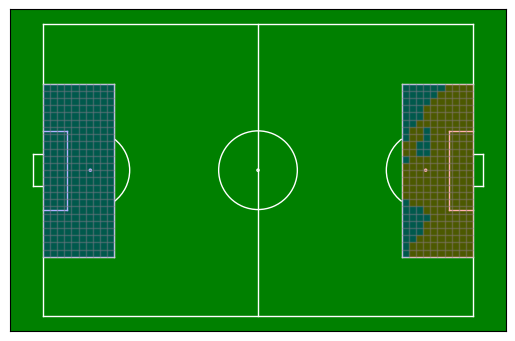

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
pitch.plot(ax = ax)
dvm2.plot(ax =ax, t=4000)

In [7]:
import numpy as np

x = np.linspace(33.5, 50 - 0.825, 10)
y = np.linspace(20.5-0.825, -20.5+0.825,10)

print(x)
print(y)

np.meshgrid(x,y)

[33.5        35.24166667 36.98333333 38.725      40.46666667 42.20833333
 43.95       45.69166667 47.43333333 49.175     ]
[ 19.675       15.30277778  10.93055556   6.55833333   2.18611111
  -2.18611111  -6.55833333 -10.93055556 -15.30277778 -19.675     ]


[array([[33.5       , 35.24166667, 36.98333333, 38.725     , 40.46666667,
         42.20833333, 43.95      , 45.69166667, 47.43333333, 49.175     ],
        [33.5       , 35.24166667, 36.98333333, 38.725     , 40.46666667,
         42.20833333, 43.95      , 45.69166667, 47.43333333, 49.175     ],
        [33.5       , 35.24166667, 36.98333333, 38.725     , 40.46666667,
         42.20833333, 43.95      , 45.69166667, 47.43333333, 49.175     ],
        [33.5       , 35.24166667, 36.98333333, 38.725     , 40.46666667,
         42.20833333, 43.95      , 45.69166667, 47.43333333, 49.175     ],
        [33.5       , 35.24166667, 36.98333333, 38.725     , 40.46666667,
         42.20833333, 43.95      , 45.69166667, 47.43333333, 49.175     ],
        [33.5       , 35.24166667, 36.98333333, 38.725     , 40.46666667,
         42.20833333, 43.95      , 45.69166667, 47.43333333, 49.175     ],
        [33.5       , 35.24166667, 36.98333333, 38.725     , 40.46666667,
         42.20833333, 43.95     

# Orientation

The following code snippets document the use of the original floodlight space control calculation and adaptations not yet comprised into one function <br>

In [9]:
import pandas as pd
import floodlight
import numpy as np
from floodlight import Pitch
from floodlight.io import dfl
from floodlight.models.space import DiscreteVoronoiModel

In [10]:
# read position data and match information file
position_file = 'PositionData/DFL_04_02_positions_raw_DFL-COM-000001_DFL-MAT-0027AD.xml'
matchinfo ='MI_Data/DFL_02_01_matchinformation_DFL-COM-000001_DFL-MAT-0027AD-Copy1.xml'

xy_objects, possession_objects, ballstatus_objects, teamsheets, pitch = dfl.read_position_data_xml(filepath_positions=position_file,
                          filepath_mat_info=matchinfo)

# returns multipe objects; at this point we only care about the positions (xy_objects) and the pitch object (pitch)

In [11]:
xy_objects

{'firstHalf': {'Home': XY(xy=array([[ -8.23, -15.61, -16.54, ...,  18.66,    nan,    nan],
         [ -8.25, -15.63, -16.51, ...,  18.66,    nan,    nan],
         [ -8.26, -15.65, -16.49, ...,  18.66,    nan,    nan],
         ...,
         [ 18.38,  15.  ,  -7.03, ...,  28.76,    nan,    nan],
         [ 18.37,  14.94,  -7.01, ...,  28.69,    nan,    nan],
         [ 18.35,  14.89,  -7.  , ...,  28.62,    nan,    nan]]), framerate=25, direction=None),
  'Away': XY(xy=array([[  2.05, -33.52,    nan, ...,  25.26,    nan,    nan],
         [  2.01, -33.51,    nan, ...,  25.25,    nan,    nan],
         [  1.99, -33.51,    nan, ...,  25.24,    nan,    nan],
         ...,
         [ 21.78,  -1.72,    nan, ...,  27.83,    nan,    nan],
         [ 21.74,  -1.79,    nan, ...,  27.8 ,    nan,    nan],
         [ 21.71,  -1.85,    nan, ...,  27.76,    nan,    nan]]), framerate=25, direction=None),
  'Ball': XY(xy=array([[-0.38, -0.28],
         [-0.35, -0.3 ],
         [-0.33, -0.32],
        

## Full pitch with original floodlight

In [12]:
# create Voronoi model
# check floodlight documentation for details on the options
DVM = DiscreteVoronoiModel(pitch = pitch, mesh = 'square', xpoints=100)
# fit model with position data of both teams 
DVM.fit(xy_objects['firstHalf']['Home'], xy_objects['firstHalf']['Away'])

In [15]:
SpaceControl_A, SpaceControl_B = DVM.team_controls()

print(SpaceControl_A.property)
print(SpaceControl_B.property)


[[46.62]
 [46.63]
 [46.63]
 ...
 [69.93]
 [69.96]
 [69.94]]
[[53.38]
 [53.37]
 [53.37]
 ...
 [30.07]
 [30.04]
 [30.06]]


## Full pitch with adapted function

In [16]:
dvm = ss.DiscreteVoronoiModel(pitch = pitch, mesh = 'square', xpoints=100)
dvm.fit(xy_objects['firstHalf']['Home'], xy_objects['firstHalf']['Away'])
dvm.team_controls()

Do you really care about the space control on the entire pitch?


(TeamProperty(property=array([[46.62],
        [46.63],
        [46.63],
        ...,
        [69.93],
        [69.96],
        [69.94]]), name='space control Team A, right', framerate=25),
 TeamProperty(property=array([[53.38],
        [53.37],
        [53.37],
        ...,
        [30.07],
        [30.04],
        [30.06]]), name='space control, Team B, left', framerate=25))

<Axes: >

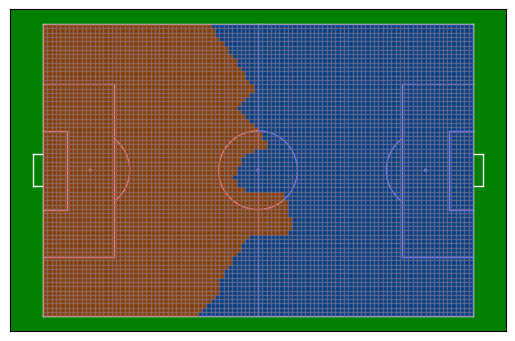

In [17]:
ax = pitch.plot()
dvm.plot(t=1, ax = ax)

## Penalty area with adapted function

In [18]:
dvm = ss.DiscreteVoronoiModel(pitch = pitch, mesh = 'square', xpoints=10, area='penalty area')
dvm.fit(xy_objects['firstHalf']['Home'], xy_objects['firstHalf']['Away'])
dvm.team_controls()

(TeamProperty(property=array([[0. ],
        [0. ],
        [0. ],
        ...,
        [2.5],
        [2.5],
        [2.5]]), name='space control Team A, right', framerate=25),
 TeamProperty(property=array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]), name='space control, Team B, left', framerate=25))

<Axes: >

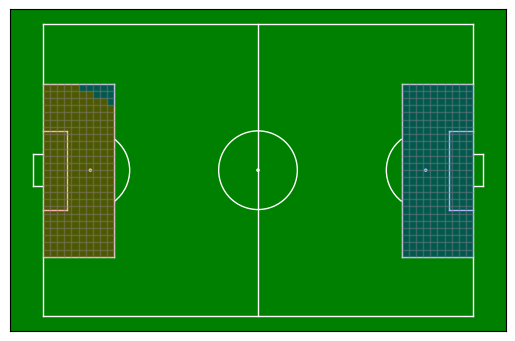

In [19]:
ax = pitch.plot()
dvm.plot(t=1000, ax = ax)

## Half with adaptation

In [20]:
dvm = ss.DiscreteVoronoiModel(pitch = pitch, mesh = 'square', xpoints=10, area='half')
dvm.fit(xy_objects['firstHalf']['Home'], xy_objects['firstHalf']['Away'])
dvm.team_controls()

(TeamProperty(property=array([[ 2.14],
        [ 2.14],
        [ 2.14],
        ...,
        [44.29],
        [43.57],
        [43.57]]), name='space control Team A, right', framerate=25),
 TeamProperty(property=array([[9.29],
        [9.29],
        [9.29],
        ...,
        [5.  ],
        [5.  ],
        [5.71]]), name='space control, Team B, left', framerate=25))

<Axes: >

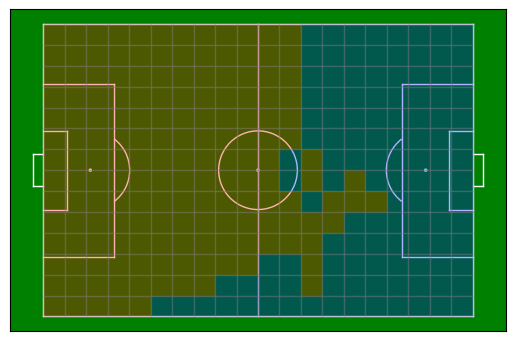

In [21]:
ax = pitch.plot()
dvm.plot(t=500, ax = ax)

## Final third with adaptation

In [22]:
dvm = ss.DiscreteVoronoiModel(pitch = pitch, mesh = 'square', xpoints=10, area='final third')
dvm.fit(xy_objects['firstHalf']['Home'], xy_objects['firstHalf']['Away'])
dvm.team_controls()

(TeamProperty(property=array([[ 0. ],
        [ 0. ],
        [ 0. ],
        ...,
        [35.5],
        [35.5],
        [35.5]]), name='space control Team A, right', framerate=25),
 TeamProperty(property=array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]), name='space control, Team B, left', framerate=25))

<Axes: >

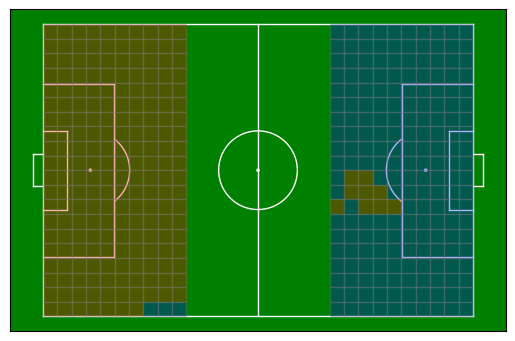

In [23]:
ax = pitch.plot()
dvm.plot(t=500, ax = ax)

## 30m via adaptation

In [24]:
dvm = ss.DiscreteVoronoiModel(pitch = pitch, mesh = 'square', xpoints=10, area='30m')
dvm.fit(xy_objects['firstHalf']['Home'], xy_objects['firstHalf']['Away'])
dvm.team_controls()

(TeamProperty(property=array([[ 0.  ],
        [ 0.  ],
        [ 0.  ],
        ...,
        [33.91],
        [33.48],
        [33.04]]), name='space control Team A, right', framerate=25),
 TeamProperty(property=array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]), name='space control, Team B, left', framerate=25))

<Axes: >

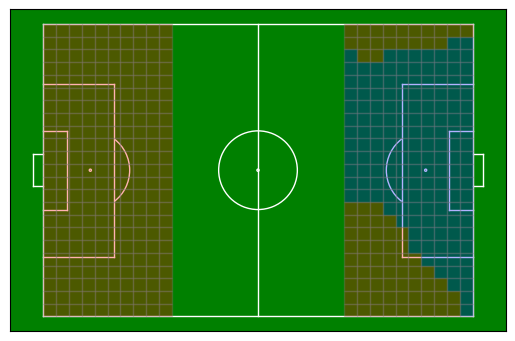

In [25]:
ax = pitch.plot()
dvm.plot(t=-1, ax = ax)

## Second half

In [26]:
dvm = ss.DiscreteVoronoiModel(pitch = pitch, mesh = 'square', xpoints=10, area='30m', home_direction='rtl')
dvm.fit(xy_objects['secondHalf']['Home'], xy_objects['secondHalf']['Away'])
dvm.team_controls()

(TeamProperty(property=array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]), name='space control, Team A, left', framerate=25),
 TeamProperty(property=array([[ 0.  ],
        [ 0.  ],
        [ 0.  ],
        ...,
        [20.87],
        [20.87],
        [20.87]]), name='space control Team B, right', framerate=25))

<Axes: >

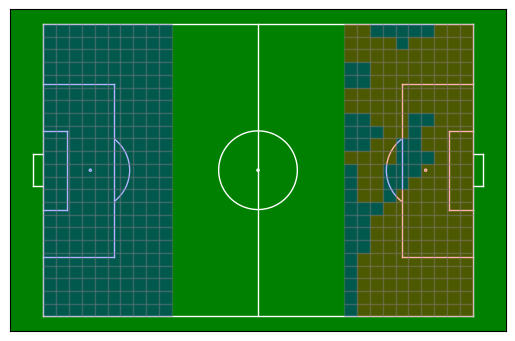

In [27]:
ax = pitch.plot()
dvm.plot(t=-1, ax = ax)

# Hexagonal

In [28]:
SCR_A1, SCR_B1, SCR_A2, SCR_B2, dvm1, dvm2 = ss.Space_Control(pos_data=xy_objects, pitch=pitch, area='penalty area',
                                                              meshtype= 'hexagonal')


# The resulting function included in DiscreteVoronoiModel_2point0.py

In [29]:
# function to return the correct space control rates for both teams in a specific area:
# pos_data = floodlight xy_object
# A_direction = direction of team A in half one (either ltr or rtl)

def Space_Control(pos_data, pitch, A_direction1 = 'ltr', meshtype = 'square', area = 'final third', resolution = 10, A_direction2 = None):
    
    A1 = pos_data['firstHalf']['Home']
    B1 = pos_data['firstHalf']['Away']
    A2 = pos_data['secondHalf']['Home']
    B2 = pos_data['secondHalf']['Away']
    
    if A_direction2 == None:
        if A_direction1 == 'ltr':
            A_direction2 = 'rtl'
        elif A_direction1 == 'rtl':
            A_direction2 = 'ltr'
        else:
            raise ValueError(f'Invalid playing direction in A_direction1. Please supply one of the following options: ["ltr", "rtl"]')

    # for the first half:
    dvm = dvm2.DiscreteVoronoiModel(pitch = pitch, mesh = meshtype, xpoints=resolution, area=area, home_direction=A_direction1)
    dvm.fit(A1, B1)
    SCR_A1, SCR_B1 = dvm.team_controls()
        
    # for the second half:
    dvm = dvm2.DiscreteVoronoiModel(pitch = pitch, mesh = meshtype, xpoints=resolution, area=area, home_direction=A_direction2)
    dvm.fit(A2, B2)
    SCR_A2, SCR_B2 = dvm.team_controls()
    
    return(SCR_A1, SCR_B1, SCR_A2, SCR_B2)